In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in

This week, you will be learning about unsupervised learning. While supervised learning algorithms need labeled examples (x,y), unsupervised learning algorithms need only the input (x). You will learn about clustering—which is used for market segmentation, text summarization, among many other applications.

# Video W8 01: Unsupervised Learning

[YouTube Video Link](https://www.youtube.com/watch?v=PK5JsJZd1Uk&index=77&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

In an unsupervised learning problem, we are given data that does not have any labels associated with it.  So what we want
from unsupervised learning algorithms is to discover some sort of structure or organization or pattern in our data.  For example,
the easiest type of structure to understand is to try and find clusters in the data of items that appear related.  Such clusters
can be useful in many applications to identify and process the members of a cluster in some specific way, such as clusters of
different types customers and their buying habits.

Up to this point we have been studying supervised learning methods.  In supervised learning, for example to
perform a classification task, we are given a traing set of data, and all of the $m$ samples in the training set are
labeled:

\begin{equation}
\text{Training set:} \{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), (x^{(3)}, y^{(3)}), \ldots, (x^{(m)}, y^{(m)}) \} 
\end{equation}

Here the $y^{(m)}$ are the labels for the data.  For example if we have the data:

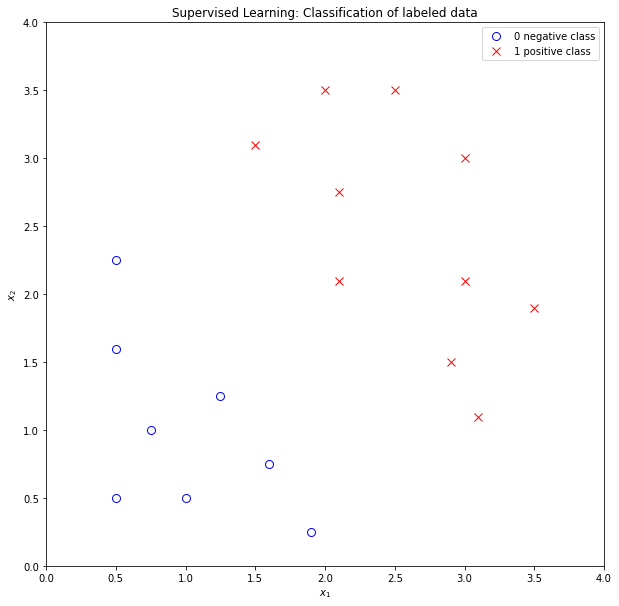

In [3]:
x = np.array([[0.5, 0.5],
              [1.0, 0.5],
              [0.75, 1.0],
              [1.9, 0.25],
              [1.6, 0.75],
              [1.25, 1.25],
              [0.5, 1.6],
              [0.5, 2.25],
              [3.1, 1.1],
              [2.9, 1.5],
              [2.1, 2.1],
              [2.1, 2.75],
              [1.5, 3.1],
              [3.5, 1.9],
              [3.0, 2.1],
              [3.0, 3.0],
              [2.0, 3.5],
              [2.5, 3.5]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

neg_idx = np.where(y == 0)
pos_idx = np.where(y == 1)

# plot the example figure
plt.figure(figsize=(10,10))

# plot the points in our two categories, y=0 and y=1, using markers to indicated
# the category or output
neg_handle = plt.plot(x[neg_idx,0], x[neg_idx,1], 'bo', markersize=8, fillstyle='none', markeredgewidth=1, label='0 negative class') 
pos_handle = plt.plot(x[pos_idx,0], x[pos_idx,1], 'rx', markersize=8, markeredgewidth=1, label='1 positive class') 

# add some labels and titles
plt.axis([0, 4, 0, 4])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Supervised Learning: Classification of labeled data');
plt.legend([neg_handle[0], pos_handle[0]], ['0 negative class', '1 positive class']);

Here the $y$ vector holds the binary classification labels, and the data we are given to train with is
in one of two classes, $0$ negative class or $1$ positive class.

For unsupervised learning we are given $m$ unlabeled samples of data to use:

\begin{equation}
\text{Training set:} \{ x^{(1)}, x^{(2)}, x^{(3)}, \ldots, x^{(m)} \} 
\end{equation}

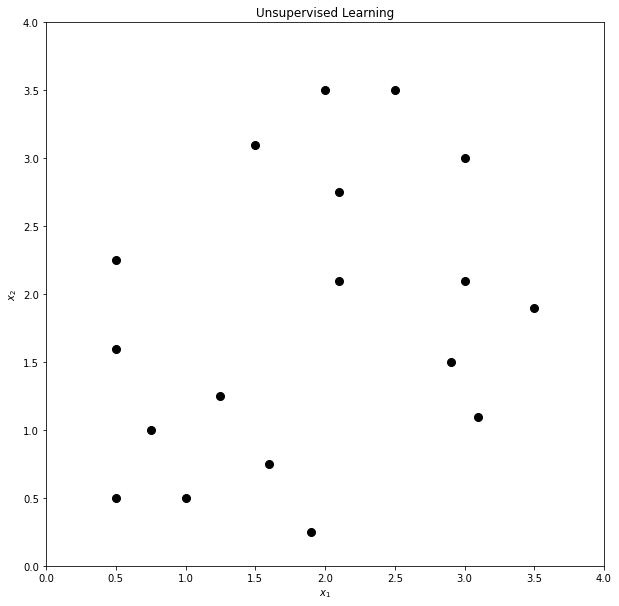

In [4]:
# plot the example figure
plt.figure(figsize=(10,10))

# plot the points in our unlabeled data
plt.plot(x[:,0], x[:,1], 'ko', markersize=8, fillstyle='full')

# add some labels and titles
plt.axis([0, 4, 0, 4])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Unsupervised Learning');

In unsupervised learning, we give the algorithm some data and we ask the algorithm to "find some structure"
in the data.

For example, given this data set, we might want the algorithm to find some likely clusters of the data, points that
may be similar or of related categories.

An algorithm that finds clusters is called a clustering algorithm.  The previous might have 2 clusters, or there
might be even 3 or 4 good clusters.

## Applications of Clustering

- marked segmentation
- social network analysis (coherent groups of people that form organically)
- organize computing clusters
- astronomical data analysis

# Video W8 02: K Means Algorithm

[YouTube Video Link](https://www.youtube.com/watch?v=6u19018FeHg&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=78)

The K-means algorithm is an example of a clustering unsupervised learning algorithm.  It is probably the simplest clustering
algorithm, but it is still quite effective.  Thus it is still one of the most popular and most used clustering algorithms.

K-means is an iterative algorithm.  We start by specifying how many clusters (e.g. K clusters) we want the algorithm to 
discover.  More formally, we can define the **K-means algorithm**

- Input:
  - $K$ (number of clusters)
  - Training set of $m$ inputs $\{x^{(1)}, x^{(2)}, \ldots, x^{(m)}\}$
- Where $x^{(i)} \in \mathbb{R}^n$ (we drop the $x_0 = 1$ convention)  

And the **K-means algorithm** pseudocode

- Randomly initialize $K$ cluster centroids $\mu_1, \mu_2, \ldots, \mu_K \in \mathbb{R}^n$

- Repeat {
  - for $i = 1$ to $m$
    - $c^{(i)}$ := index (from 1 to $K$) of cluster centroid closest to $x^{(i)}$
  - for $k = 1$ to $K$
    - $\mu_k$ := average (mean) of points assigned to cluster $k$
- }

This basic algorithm for K-means clustering is really fairly simple, and it will help to understand it even further if we make
a quick and basic implementation of the algorithm in Python code.  First of all, we will read in a small simple set of
data that appears to be well separated into 2 clusters.  This dataset has $m = 32$ examples.  The dataset has only 2 features
$n = 2$, thus all of the points are in 2 dimensional space.

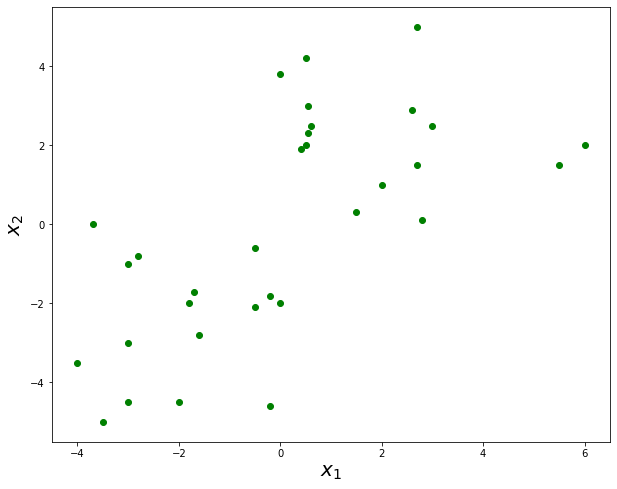

In [5]:
#from sklearn.datasets import make_blobs
#X, y = make_blobs(n_samples = 10, n_features=2, centers=2, cluster_std = 0.8, center_box=(2, 5))
#np.savetxt('../data/lect-11-ex1data.csv', X, delimiter=',')
X = np.loadtxt('../data/lect-11-ex1data.csv', delimiter=',')

plt.plot(X[:, 0], X[:, 1], 'go')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20);

The first step in the K-means algorithm is to randomly initialize a set of centroids.  We usually initialze the centroids to be
within the ranges of the data set.  So for example, if we find the minimum and maximum values for the data for each of the dimensions,
we can use this to randomly initialize our centroids.  In this case, we are going to try and find $K = 2$ clusters, so we want to
create two centroids within the range of our data:

-4.0 6.0
-5.0 5.0


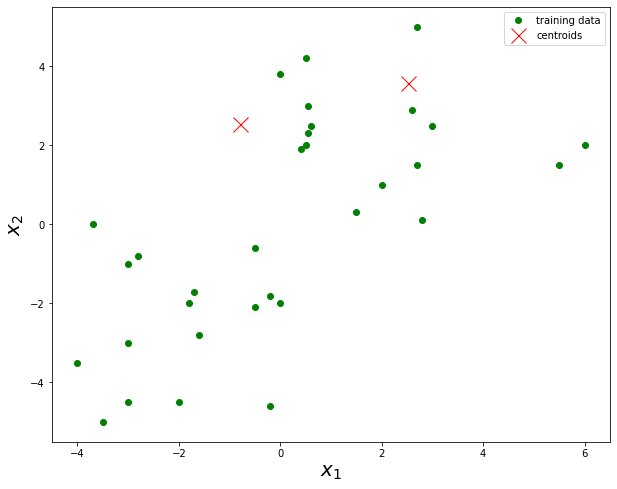

In [6]:
# The number of clusters K we will find
K = 2

# The number of training data points, and the number of dimensions of our data set
m, n = X.shape

# randomly initialize K centroids
min_x1, max_x1 = min(X[:, 0]), max(X[:, 0])
min_x2, max_x2 = min(X[:, 1]), max(X[:, 1])
print(min_x1, max_x1)
print(min_x2, max_x2)

# create K centroids mu, where each point is randomly chosen within the range of the data
mu = np.zeros( (K, n) )
for k in range(K):
    mu[k, 0] = np.random.uniform(low = min_x1, high = max_x1)
    mu[k, 1] = np.random.uniform(low = min_x2, high = max_x2)
    
# visualize the original data, with our randomly chosen initial centroid points
plt.plot(X[:, 0], X[:, 1], 'go', label='training data')
plt.plot(mu[:,0], mu[:,1], 'rx', markersize=15, label='centroids')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend();

In the video, the first step in the iterative part of the K-means algorithm is to assign each of the training data points to
one of our $\mu$ clusters.  As shown in the video, we do this by calculating the distance between each data point and our
two centroids, and we assign the point to the closest centroid.  The measure used to calculate the distance can actually be
calculated in different ways.  The simplest is to use the eucledian distance.  And since the distance can be negative
depending on the order we evaluate points when calculating the distance, we usually take the square of the distance so that
all values are positive (e.g. we get the magnitude of the distance), and we can thus compare directly and find the minimum.

$$
\underset{k}{\textrm{min}} \;\; \| x^{(i)} - \mu_k  \|^2
$$

For example, lets calculate the distance between the first training data point and the two randomly generated centroids.  Keep 
in mind that in Python, our arrays are indexed starting at 0, so the first training data example will be at $i = 0$.  Also, with
$K = 2$ cluster centroids, the $k$ clusters will range from $0$ to $1$.

Lets start by defining a function that will take 2 $n$ dimensional points, and calculate the square of the distance between
the two points:

In [7]:
def distance(x, y):
    # calculate the square of the distance between 2 n dimensional points (passed as numpy arrays)
    # eucledian distance is sqrt( (x_1 - y_1)**2.0 + (x_2 - y_2)**2.0 ), but we then square this, so
    # we simply need the sum of the differences squared
    return np.sum( (x - y)**2.0 )

In [8]:
# distance from the 0th training example and 0th cluster
i = 0
k = 0
print("%d training example: (%f, %f)" % (i, X[i,0], X[i,1]))
print("%d cluster centroid: (%f, %f)" % (k, mu[k,0], mu[k,1]))
print("square distance between input %d and cluster %d: %f" % (i, k, distance(X[i,:], mu[k,:])))

# distance from the 0th training example and 1th cluster
i = 0
k = 1
print("")
print("%d training example: (%f, %f)" % (i, X[i,0], X[i,1]))
print("%d cluster centroid: (%f, %f)" % (k, mu[k,0], mu[k,1]))
print("square distance between input %d and cluster %d: %f" % (i, k, distance(X[i,:], mu[k,:])))

0 training example: (-3.500000, -5.000000)
0 cluster centroid: (2.513523, 3.572852)
square distance between input 0 and cluster 0: 109.656244

0 training example: (-3.500000, -5.000000)
1 cluster centroid: (-0.791775, 2.535472)
square distance between input 0 and cluster 1: 64.117815


By the way, the above function for calculating the distance basically does the same thing as calculating 
the norm between the two point vectors

In [9]:
def distance_norm(x, y):
    # calculate the square of the distance between 2 n dimensional points (passed as numpy arrays)
    # using the linear algebra vector norm to calculate the distance
    return np.linalg.norm(x - y)**2.0


In [10]:
# distance from the 0th training example and 0th cluster
i = 0
k = 0
print("%d training example: (%f, %f)" % (i, X[i,0], X[i,1]))
print("%d cluster centroid: (%f, %f)" % (k, mu[k,0], mu[k,1]))
print("square distance between input %d and cluster %d: %f" % (i, k, distance_norm(X[i,:], mu[k,:])))

# distance from the 0th training example and 1th cluster
i = 0
k = 1
print("")
print("%d training example: (%f, %f)" % (i, X[i,0], X[i,1]))
print("%d cluster centroid: (%f, %f)" % (k, mu[k,0], mu[k,1]))
print("square distance between input %d and cluster %d: %f" % (i, k, distance_norm(X[i,:], mu[k,:])))

0 training example: (-3.500000, -5.000000)
0 cluster centroid: (2.513523, 3.572852)
square distance between input 0 and cluster 0: 109.656244

0 training example: (-3.500000, -5.000000)
1 cluster centroid: (-0.791775, 2.535472)
square distance between input 0 and cluster 1: 64.117815


The first part of the iterative algorithm is to calculate such distances between each training data item and every centroid, 
find the minimum, and assign the training data item to be in the cluster whose centroid it is closest too.  So for example,
we can determine the closest centroid for each training data point like this

point x[0] in cluster: 1
point x[1] in cluster: 1
point x[2] in cluster: 1
point x[3] in cluster: 1
point x[4] in cluster: 1
point x[5] in cluster: 1
point x[6] in cluster: 1
point x[7] in cluster: 1
point x[8] in cluster: 1
point x[9] in cluster: 1
point x[10] in cluster: 1
point x[11] in cluster: 1
point x[12] in cluster: 1
point x[13] in cluster: 1
point x[14] in cluster: 1
point x[15] in cluster: 1
point x[16] in cluster: 1
point x[17] in cluster: 1
point x[18] in cluster: 1
point x[19] in cluster: 1
point x[20] in cluster: 1
point x[21] in cluster: 1
point x[22] in cluster: 1
point x[23] in cluster: 1
point x[24] in cluster: 0
point x[25] in cluster: 0
point x[26] in cluster: 0
point x[27] in cluster: 0
point x[28] in cluster: 0
point x[29] in cluster: 0
point x[30] in cluster: 0
point x[31] in cluster: 0


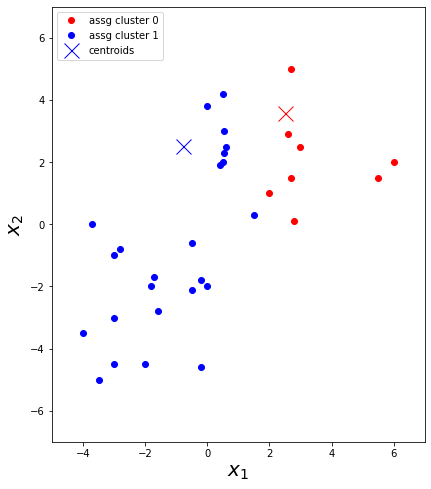

In [11]:
# This array will hold the index k of the cluster centroid each training data point is assigned too
c = np.zeros(m)

# for each training data point i
for i in range(m):
    # determine distance to cluster 0
    min_distance = distance_norm(X[i,:], mu[0, :])
    c[i] = 0
    # find out if any other cluster centroid k=1,...K is closer
    for k in range(1, K):
        another_distance = distance_norm(X[i,:], mu[k, :])
        if another_distance < min_distance:
            min_distance = another_distance
            c[i] = k
            
# the above loop represents the code needed to assign each point to the closest cluster mu.  Here were the
# clusters that each point was assigned to
for i in range(m):
    print("point x[%d] in cluster: %d" % (i, c[i]))
            
# lets visualize the resulting assignments of the points to the current cluster centroids
cluster_0 = np.where(c == 0)[0]
cluster_1 = np.where(c == 1)[0]

#plt.figure(figsize=(8,16))
ax = plt.gca()
ax.set_aspect('equal')

plt.plot(X[cluster_0, 0], X[cluster_0, 1], 'ro', label='assg cluster 0')
plt.plot(mu[0,0], mu[0,1], 'rx', markersize=15)
plt.plot(X[cluster_1, 0], X[cluster_1, 1], 'bo', label='assg cluster 1')
plt.plot(mu[1,0], mu[1,1], 'bx', markersize=15, label='centroids')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend(loc=2)
plt.axis([-5, 7, -7, 7]);

Once we have found which centroid each training data item is closest to, it is time to update the centroids.  We do this by calculating
new mu centroids which are simply the average of all of the points assigned to that centroid.  For example, we can use numpy vector
operations and the c array to find and average all of the points assigned to cluster $k = 0$

In [12]:
cluster_0 = np.where(c == 0)[0]
print(X[cluster_0])
print(np.mean(X[cluster_0], axis=0))

[[2.  1. ]
 [2.8 0.1]
 [2.7 1.5]
 [2.6 2.9]
 [2.7 5. ]
 [3.  2.5]
 [5.5 1.5]
 [6.  2. ]]
[3.4125 2.0625]


We can use the above idea to recalculate all $K$ centroids:

[[ 3.4125      2.0625    ]
 [-1.12083333 -0.82916667]]


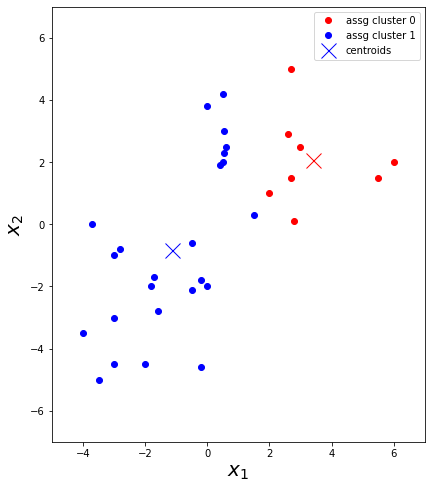

In [13]:
# recalculate all cluster centroids
for k in range(K):
    cluster_pts = np.where(c == k)[0]
    mu[k] = np.mean(X[cluster_pts], axis=0)


# show the resulting new cluster centroids
print(mu)


# visualize the new centroid locations in relation to the assigned points in the clusters
cluster_0 = np.where(c == 0)[0]
cluster_1 = np.where(c == 1)[0]

#plt.figure(figsize=(8,16))
ax = plt.gca()
ax.set_aspect('equal')

plt.plot(X[cluster_0, 0], X[cluster_0, 1], 'ro', label='assg cluster 0')
plt.plot(mu[0,0], mu[0,1], 'rx', markersize=15)
plt.plot(X[cluster_1, 0], X[cluster_1, 1], 'bo', label='assg cluster 1')
plt.plot(mu[1,0], mu[1,1], 'bx', markersize=15, label='centroids')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend(loc=1)
plt.axis([-5, 7, -7, 7]);

The previous steps to randomly initialize a set of centroids, then repeatedly assign points to closest centroid and move the
centroids can easily be made into a function that performs the basic K-means algorithm.  We will leave this as an exercise
for the student for now to try and bring these pieces together.

## K-means for non-separated clusters

The previous example(s) had data that looked well separated.  However you can still run k-means clustering on
data that is not so clearnly separated.  Often analysis of a market to do market segmentation can benefit from
doing a k-means clustering even on data without real clear segmented groups.

# Video W8 03: Optimization Objective

[YouTube Video Link](https://www.youtube.com/watch?v=omcDeBY4lGE&index=79&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

As this video discusses, we can formally define a cost function and optimization objective for the K-means algorithm.
The cost function is high when the points in a cluster are far away from the cluster centroid, and it will be lower
when the points in a cluster are close to the cluster centroid:

$$
J(c^{(1)}, \ldots, c^{(m)}, \mu_1, \ldots, \mu_K) = \frac{1}{m} \sum_{i=1}^m \| x^{(i)} - \mu_{c^{(i)}} \|^2
$$

Thus for optimization we are trying to assign our points to clusters, which define the cluster centroids, that minimizes
this cost objective function:

$$
\underset{c^{(1)}, \ldots, c^{(m)}, \\ \mu_1, \ldots, \mu_K}{\textrm{min}} \;\; J(c^{(1)}, \ldots, c^{(m)}, \mu_1, \ldots, \mu_K)
$$

In words, k-means is trying to find parameters $c^{(i)}$ and $\mu_k$ that minimizes the sum of the squared distances
between each point and its assigned centroid.  It should be obvious from the previous pseudocode that we
assign the points to the centroid that it is closest too, thus we are minimizing the distance from each point to the
current set of centroids.  K-means is another example of a greedy algorithm.  But in this case, the next step
after cluster assignment of recalculating centroid locations based on the current assigned points in the cluster, can
be shown to lead to $\mu_k$ points that will end up having minimal overall summed up costs, once the algorithm
has converged.

So in other words, the cluster assignment step minimizes the cost function of the centroids with respect to
the cluster assignments, while holding the centroids fixed.   Then in the second step to move the centroids,
it chooses the values of $\mu_k$ that minimize the cost function with respect to the changing centroids.

# Video W8 04: Random Initialization

[YouTube Video Link](https://www.youtube.com/watch?v=wniLibHEE2Y&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=80)

Above we showed simply picking $K$ random points within the range of the training data examples in order to randomly choose the
initial cluster centroids.  In this video, the instructor illustrates a different method, which usually works a bit better, and
it is actually a bit easier to understand.  If we want to discover $K$ cluster, we can simply choose $K$ of our input training
data points at random to be our initial centroids.  We know that by picking 2 of the input data points that the centroids will
automatically be within the range of the training data.  So for example, in Python, we could choose K points at random
to be our centroids like this:

In [14]:
# choose the number of clusters we will be creating
K = 2

# this will choose 2 indexes in range 0 to m-1, that we will use as our initial points for the mu centroids
# NOTE: in the next function, the replace=False ensures that the choice() function will not pick the same random
# index.
random_pts = np.random.choice(m, size=K, replace=False)
print(random_pts)

mu = X[random_pts]
print(mu)

[29 22]
[[3.  2.5]
 [0.5 4.2]]


This method is the recommended way to choose the initial K centroid methods, and is what will normally be used
by a K-means library like for example the scikit-learn K-means implementation.

The optimization cost function defined by K-means is not guaranteed to have only 1 global minimum (unlike
some previous cost functions we defined).  Thus when you run a K-means with random initial points, the
clusters the algorithm finds and converges on can be different depending on the random starting locations
picked.  Thus K-means is not deterministic, you can get different clustering results each time you run
the algorithm.

One solution to this is to run K-means multiple times with different starting random initializations.  At the
end of K-means clustering, once the algorithm has converged, you can find the final cost of the discovered
clusters.  Usually if you are hitting local minimum when clustering, if you run multiple times you can compare
the final costs of the multiple runs, and usually the lower or lowest final costs achieved will be the better
clusterings of your data.

Somewhat backwards from what you might intuitively expect, local optimization tend to be more of a problem when
the number of clusters K you want to determine is relatively small, say from 2 to 10 as a rule of thumb.  For these
number of clusters it is usually a good idea to run 50 to 1000 or so K-means clustering attempts, keep track
of the final cost of each, and examine/use the one that achieved the lowest cost at the end.

However when you are trying to create larger number of clusters, often the minimum that exist are going to
be all relatively close to the same, so one clustering, even if different from another one found, will have
a similar overall cost.  Thus when trying to determine a large number of clusters/segments it is not as useful
or necessary to run multiple times to watch out for local minima results.

# Video W8 05: Choosing the Number of Clusters

[YouTube Video Link](https://www.youtube.com/watch?v=izCbbMbRWHw&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=81)

The most common method is still to choose the number of clusters you want by hand.  Sometimes the problem you are trying to
cluster natually lends itself to a particular number of clusters you desire (e.g. we want to design t-shirts for 3 sizes, S, M and L).  Other times, you can do some visualization of the data, and get a rough idea of how many there might be, but often there can
be different interpretations of this.


It is often genuinly ambiguous the number of clusters in a data set.  Even if/when you can visualize, there will
often be ambiguity, and different clustering can be supported based on the needs of the application.

There are some things you can do to try and help to algorithmically pick a good size for K for your clustering.

In the Elbow method, you compute the cluster for $K=1, 2, 3, ... N$, and look at the final cost function $J$ achieved
for each $K$ clustering size.  If you plot the cost, often there will be some point where the cost changes from going
down rapidly to going down much slower.  Often the "Elbow" of this curve, or somewhere around it, will be a good
number of cluster for the data you have.

However it is possible to get a much more ambiguous result, where there is no apparent elbow to your graph.
In practice this will often be the case.  It can be worth a shot, but as often as not you won't get a good idea
from this of what might be a good K size, thus you will have to result to other means.

Another method is really application driven.  If you have some metric downstream for evaluating the effectiveness
of your application, you can then compare that metric when you try different clustering values K, and use the
clustering/segmentation that works best for the application domain.

# K-Means Clustering with Scikit-Learn

`Scikit-Learn` has clustering algorithms in the `sklearn.cluster` sublibrary.

We can get a basic clustring of the made up data set we had previously using $K = 2$
clusters like this:

In [15]:
# fit a clustering estimator to the made up date
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=2);
cluster.fit(X)

# display/access the results, like the final cluster centers, the labels of the data, and the final cost
centers = cluster.cluster_centers_
print(centers)
labels = cluster.labels_
print(labels)
cost = cluster.inertia_
print(cost)


[[ 1.99375  2.28125]
 [-1.96875 -2.49375]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
139.75249999999997


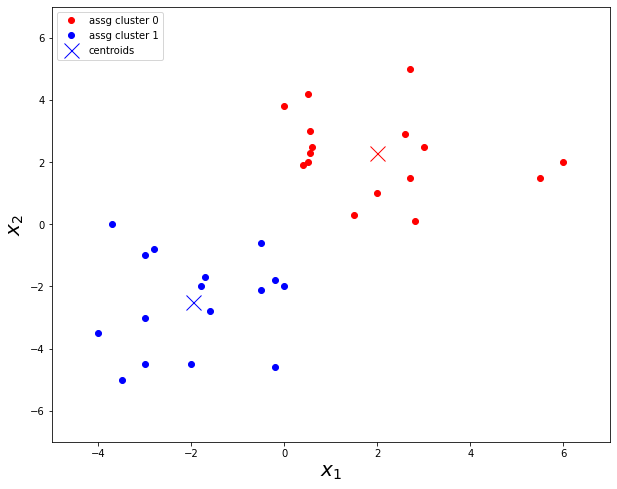

In [16]:
# visualize the final cluster labels found
cluster_0 = np.where(labels == 0)[0]
cluster_1 = np.where(labels == 1)[0]

plt.plot(X[cluster_0, 0], X[cluster_0, 1], 'ro', label='assg cluster 0')
plt.plot(centers[0,0], centers[0,1], 'rx', markersize=15)
plt.plot(X[cluster_1, 0], X[cluster_1, 1], 'bo', label='assg cluster 1')
plt.plot(centers[1,0], centers[1,1], 'bx', markersize=15, label='centroids')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend(loc=2)
plt.axis([-5, 7, -7, 7]);

## Check for Local Minima

In this case for our made up data the clusters are pretty well separated, and local minima are not so easy
to find.  Lets run the cluster 1000 times, and keep the worst and best K-means clusters we find based on the
cost (inertia) measure.

By default `scikit-learn` actually performs the clustering 10 times (controlled by the `n_init`) parameter.
If we want to see different results, we should set `n_init = 1` so that only 1 clustering is performed.

In [17]:
N = 1000

clusters = []
cost = np.empty(N)

# now perform different clusterings, checking for ones that improve or make things worse
for n in range(N):
    cluster = KMeans(n_clusters=2, n_init=1)
    cluster.fit(X)
    clusters.append(cluster)
    cost[n] = cluster.inertia_

In [18]:
# in this case, we are never seeing any solution other than the 1 minimum that is discovered
print(cost.min())
print(cost.max())

139.75249999999997
139.75249999999997


## Determine K number of clusters

Likewise lets try and illustrate the Elbow method, and fit the data with clusters of size $K = 1 \cdots 10$
Again the data looks like 2 clusters is pretty optimal, so we won't get a very useful result here.

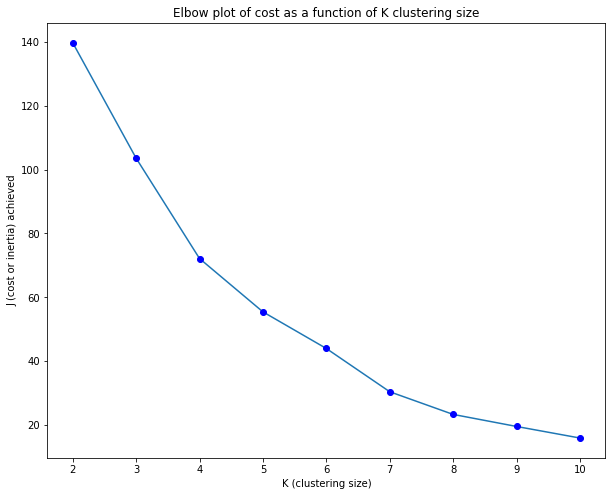

In [19]:
MAX_K = 10

clusters = []
cost = np.empty(MAX_K+1)

# perform clusterings for K ranging from 2 to MAX_K.  If we were having local minima issues, we might also want
# to run k-means multiple times for each K and find/choose the best cost achieved for the elbow graph
for k in range(2, MAX_K+1):
    cluster = KMeans(n_clusters=k)
    cluster.fit(X)
    clusters.append(cluster)
    cost[k] = cluster.inertia_
    
# visualize the resulting costs as a function of K clustering size
plt.plot(np.arange(2,MAX_K+1), cost[2:])
plt.plot(np.arange(2,MAX_K+1), cost[2:], 'bo')
plt.xlabel('K (clustering size)')
plt.ylabel('J (cost or inertia) achieved')
plt.title("Elbow plot of cost as a function of K clustering size");

# K-Means Clustering on Iris Data

Using the simple data set does not give a great example of the potential for local minima and choosing K.
Here we perform the previous again, but use the iris data set.  The iris data set is 4 dimensional, and we will
use all 4 dimensions.  We will try clustering into 3 cluster, which is of course the number of categories
we have for the original iris data set.


In [20]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data

In [21]:
# create a K-means clustering with K=3
cluster = KMeans(n_clusters=3);
cluster.fit(X)

# display/access the results, like the final cluster centers, the labels of the data, and the final cost
centers = cluster.cluster_centers_
print(centers)
labels = cluster.labels_
print(labels)
cost = cluster.inertia_
print(cost)


[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
78.851441426146


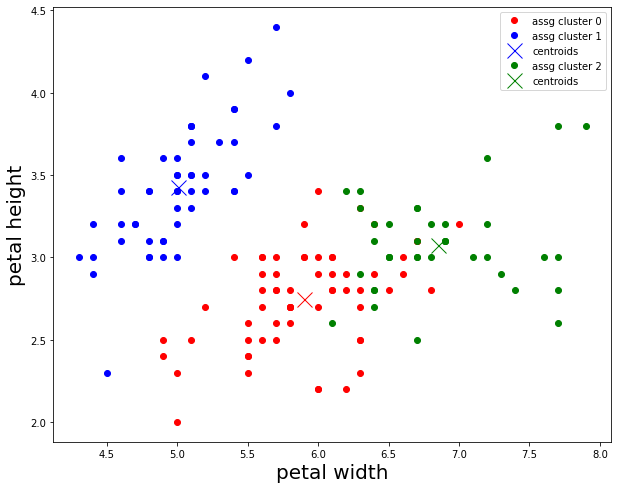

In [22]:
# visualize resulting clusters on the 2 dimensions of Petal length/width
cluster_0 = np.where(labels == 0)[0]
cluster_1 = np.where(labels == 1)[0]
cluster_2 = np.where(labels == 2)[0]

plt.plot(X[cluster_0, 0], X[cluster_0, 1], 'ro', label='assg cluster 0')
plt.plot(centers[0,0], centers[0,1], 'rx', markersize=15)
plt.plot(X[cluster_1, 0], X[cluster_1, 1], 'bo', label='assg cluster 1')
plt.plot(centers[1,0], centers[1,1], 'bx', markersize=15, label='centroids')
plt.plot(X[cluster_2, 0], X[cluster_2, 1], 'go', label='assg cluster 2')
plt.plot(centers[2,0], centers[2,1], 'gx', markersize=15, label='centroids')
plt.xlabel(r'petal width', fontsize=20)
plt.ylabel(r'petal height', fontsize=20)
plt.legend();

## Check for Local Minima

In [23]:
N = 1000

clusters = []
cost = np.empty(N)

# now perform different clusterings, checking for ones that improve or make things worse
for n in range(N):
    cluster = KMeans(n_clusters=3, n_init=1)
    cluster.fit(X)
    clusters.append(cluster)
    cost[n] = cluster.inertia_

In [24]:
# For the iris data
print(cost.min())
print(cost.max())
print(np.unique(cost))

78.851441426146
145.4526917648503
[ 78.85144143  78.85566583 142.75352002 142.7540625  145.45269176]


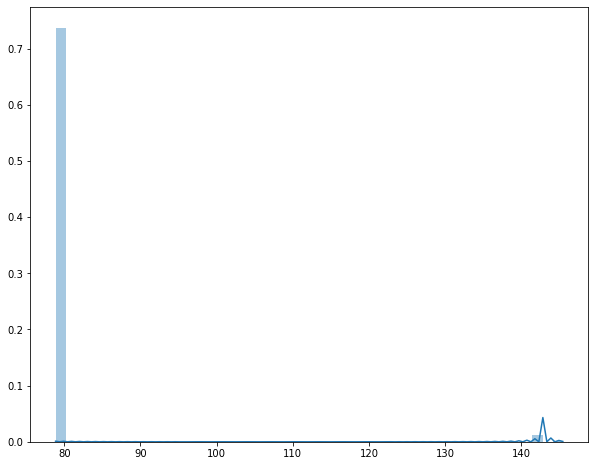

In [25]:
sns.distplot(cost);

In this case, it looks like we usually discover 3 or 4 unique mimina.  Most of the time we get a cost of a bit
over 78.  But sometimes we get 142 or 145, which are probably not as optimal clusterings.  Lets plot one of
the 145 cost clusterings:

In [26]:
len(clusters)
clusters[318]

KMeans(n_clusters=3, n_init=1)

In [27]:
cluster_num = np.where(cost > 140)[0][0]
print(cluster_num)
cluster = clusters[cluster_num]

centers = cluster.cluster_centers_
print(centers)
labels = cluster.labels_
print(labels)
cost = cluster.inertia_
print(cost)


9
[[4.73181818 2.92727273 1.77272727 0.35      ]
 [6.31458333 2.89583333 4.97395833 1.703125  ]
 [5.19375    3.63125    1.475      0.271875  ]]
[2 0 0 0 2 2 0 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 2 2 2 0 2 2
 2 0 2 2 0 0 2 2 0 2 0 2 2 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
142.7540625000001


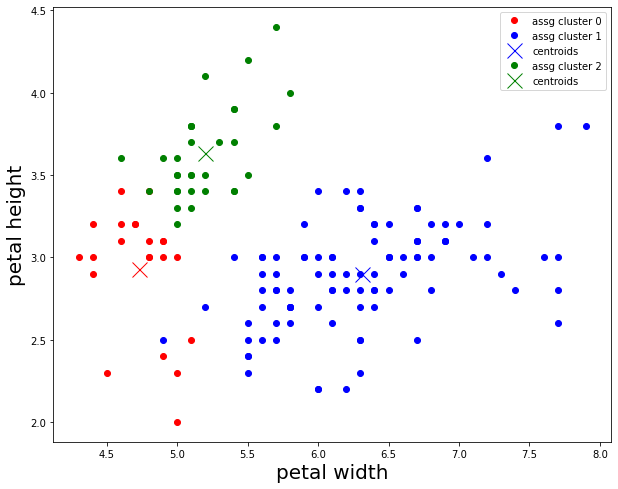

In [28]:
# visualize resulting clusters on the 2 dimensions of Petal length/width
cluster_0 = np.where(labels == 0)[0]
cluster_1 = np.where(labels == 1)[0]
cluster_2 = np.where(labels == 2)[0]

plt.plot(X[cluster_0, 0], X[cluster_0, 1], 'ro', label='assg cluster 0')
plt.plot(centers[0,0], centers[0,1], 'rx', markersize=15)
plt.plot(X[cluster_1, 0], X[cluster_1, 1], 'bo', label='assg cluster 1')
plt.plot(centers[1,0], centers[1,1], 'bx', markersize=15, label='centroids')
plt.plot(X[cluster_2, 0], X[cluster_2, 1], 'go', label='assg cluster 2')
plt.plot(centers[2,0], centers[2,1], 'gx', markersize=15, label='centroids')
plt.xlabel(r'petal width', fontsize=20)
plt.ylabel(r'petal height', fontsize=20)
plt.legend();

This is definitely not a good clustering, it has broken up the smaller separate group (which were the easier
to classify Virginica samples) into 2, and group the other 2 into 1 big cluster.

## Determine K number of Clusters

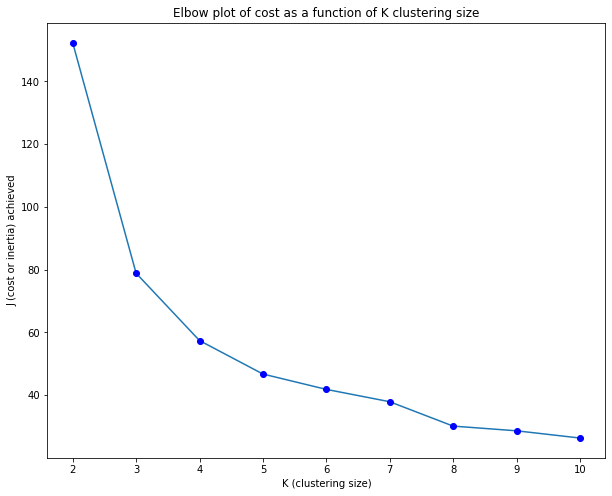

In [29]:
MAX_K = 10

clusters = []
cost = np.empty(MAX_K+1)

# perform clusterings for K ranging from 2 to MAX_K.  If we were having local minima issues, we might also want
# to run k-means multiple times for each K and find/choose the best cost achieved for the elbow graph
for k in range(2, MAX_K+1):
    cluster = KMeans(n_clusters=k, n_init=1)
    cluster.fit(X)
    clusters.append(cluster)
    cost[k] = cluster.inertia_
    
# visualize the resulting costs as a function of K clustering size
plt.plot(np.arange(2,MAX_K+1), cost[2:])
plt.plot(np.arange(2,MAX_K+1), cost[2:], 'bo')
plt.xlabel('K (clustering size)')
plt.ylabel('J (cost or inertia) achieved')
plt.title("Elbow plot of cost as a function of K clustering size");

In [30]:
import sys
sys.path.append("../src") # add our class modules to the system PYTHON_PATH

from ml_python_class.custom_funcs import version_information
version_information()

              Module   Versions
--------------------   ------------------------------------------------------------
         matplotlib:   ['3.2.2']
              numpy:   ['1.18.5']
             pandas:   ['1.0.5']
            seaborn:   ['0.10.1']
